In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets, transforms
import torchvision

## Load in MNIST Data

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [4]:
trainset = torchvision.datasets.MNIST(root='~/datasets', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1000,
                                          shuffle=True, num_workers=2,
                                          pin_memory=True)

In [5]:
X, y = next(iter(trainloader))

## Standardize and Reshape

In [6]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X.reshape(X.shape[0], -1))
X.shape

(1000, 784)

In [7]:
X = torch.tensor(X)
cov_mat = torch.matmul(X.T, X)

In [8]:
vals, vectors = torch.symeig(cov_mat, eigenvectors=True)

In [9]:
pca_vecs = vectors[:, -10:]

In [10]:
embeds = X.matmul(pca_vecs)


In [15]:
print(embeds.shape)

torch.Size([1000, 10])


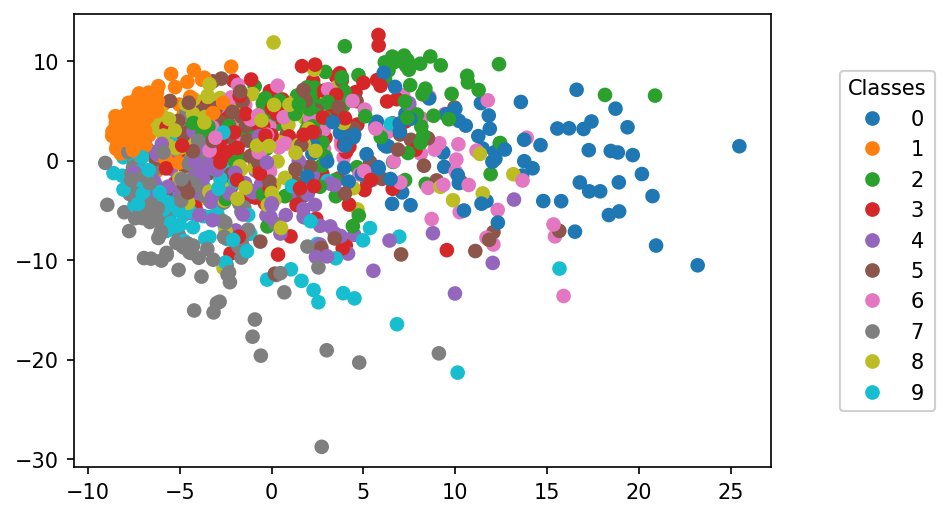

In [11]:
fig, ax = plt.subplots(dpi=150)
scatter = ax.scatter(embeds[:, -1], embeds[:, -2], c=y, cmap='tab10')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc='center right', title="Classes", bbox_to_anchor=(1.25, 0.5))
ax.add_artist(legend1)
plt.show()

## Let's try to generate a 1

In [12]:
keepers = torch.where(y == 1)[0]

In [13]:
embedded_ones = embeds[keepers, :]
mean_one = embedded_ones.mean(0)

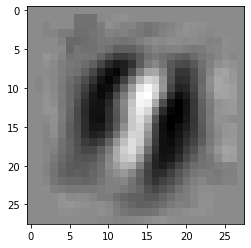

In [14]:
plt.imshow(pca_vecs.matmul(mean_one).reshape(28, 28), cmap='gray')

### And a 0

In [ ]:
keepers = torch.where(y == 0)[0]
embedded_zeros = embeds[keepers, :]
mean_zero = embedded_zeros.mean(0)

In [ ]:
plt.imshow(pca_vecs.matmul(mean_zero).reshape(28, 28), cmap='gray')

## What if we interpolate between these?

In [ ]:
n_generate = 10
generated = torch.zeros(n_generate, 28, 28)
ts = torch.linspace(0, 1, n_generate)

for ii in range(n_generate):
    embed = ts[ii] * mean_one + (1 - ts[ii]) * mean_zero
    generated[ii, ::] = pca_vecs.matmul(embed).reshape(28, 28)

In [ ]:
fig, ax = plt.subplots(1, 10, dpi=250)
for ii in range(n_generate):
    ax[ii].imshow(generated[ii], cmap='gray')
    ax[ii].set_xticks([])
    ax[ii].set_yticks([])